In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

In [2]:
d = io.imread('taibei101.jpg')
d = np.array(d, dtype=np.float64) / 255

In [3]:
d.shape

(600, 800, 3)

In [9]:
d

array([[[0.71372549, 0.55686275, 0.83137255],
        [0.70588235, 0.56078431, 0.82352941],
        [0.70196078, 0.56470588, 0.82352941],
        ...,
        [0.64313725, 0.4745098 , 0.75294118],
        [0.63529412, 0.4745098 , 0.74901961],
        [0.62352941, 0.46666667, 0.74509804]],

       [[0.70588235, 0.56078431, 0.83137255],
        [0.70588235, 0.56078431, 0.83137255],
        [0.70980392, 0.56470588, 0.83529412],
        ...,
        [0.63529412, 0.4745098 , 0.74901961],
        [0.63529412, 0.4745098 , 0.74901961],
        [0.63529412, 0.4745098 , 0.74901961]],

       [[0.71764706, 0.56470588, 0.82745098],
        [0.71764706, 0.56470588, 0.82745098],
        [0.70980392, 0.56470588, 0.83529412],
        ...,
        [0.63137255, 0.47058824, 0.7372549 ],
        [0.63137255, 0.47058824, 0.7372549 ],
        [0.63529412, 0.46666667, 0.7372549 ]],

       ...,

       [[0.45882353, 0.38431373, 0.31764706],
        [0.45490196, 0.38823529, 0.3254902 ],
        [0.42745098, 0

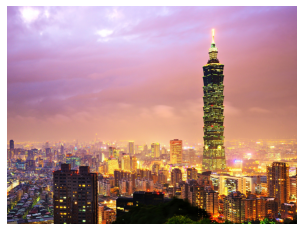

In [4]:
plt.axis('off')
plt.imshow(d); plt.show()

In [5]:
# 利用K Means进行压缩
def KMeansImage(d, n_colors):
    w, h, c = d.shape
    new_img = d.copy()

    dd = np.reshape(d, (w * h, c))
    km = KMeans(n_clusters=n_colors)
    km.fit(dd)
    labels = km.predict(dd)
    centers = km.cluster_centers_

    for i in range(w):
        for j in range(h):
            ij = i * h + j
            new_img[i][j] = centers[labels[ij]]
    return {'new_image': new_img, 'center_colors': centers}

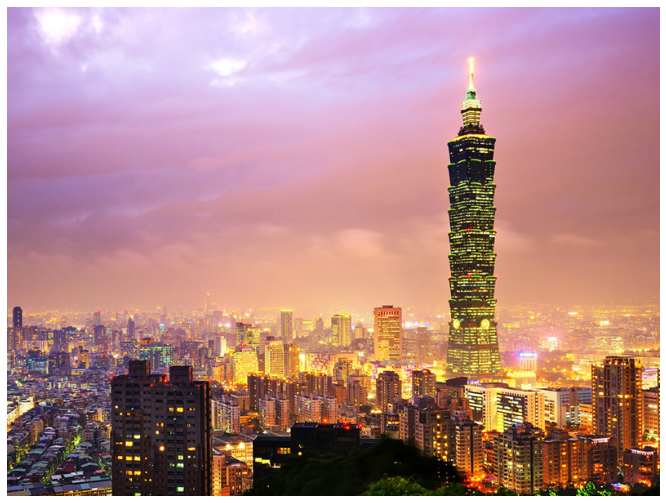

Number of clusters: 2


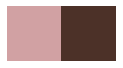

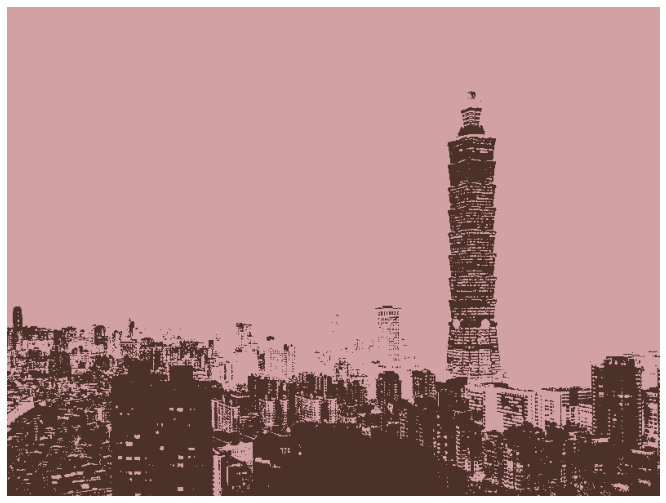

Number of clusters: 3


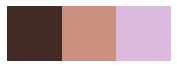

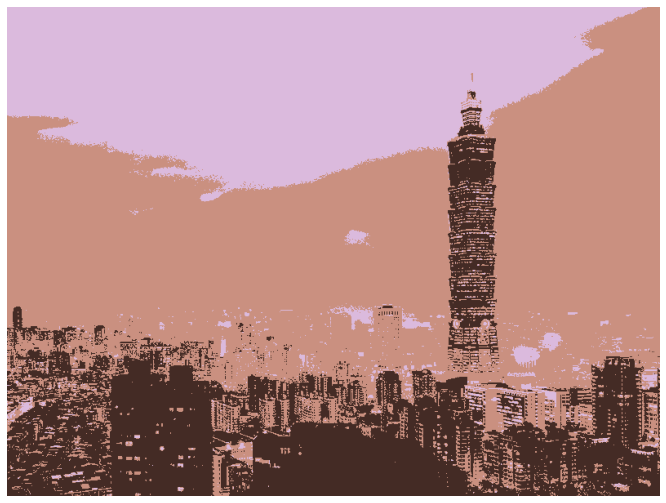

Number of clusters: 5


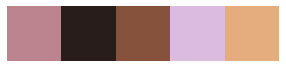

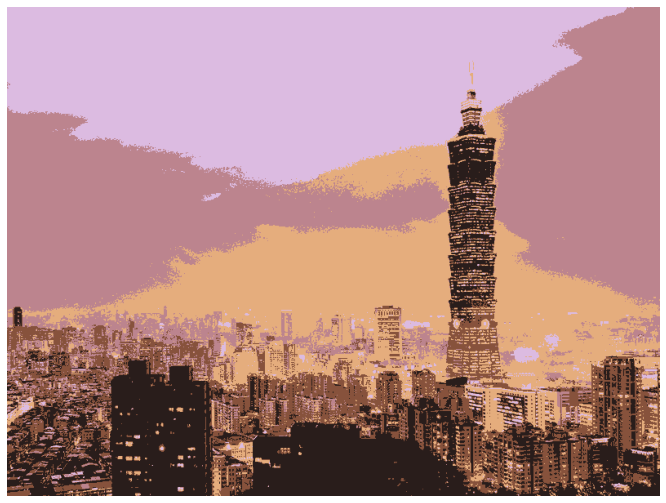

Number of clusters: 10


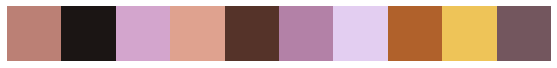

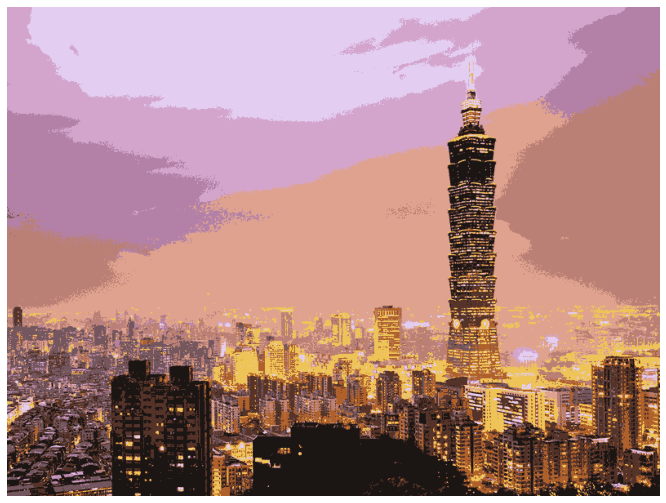

Number of clusters: 30


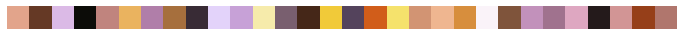

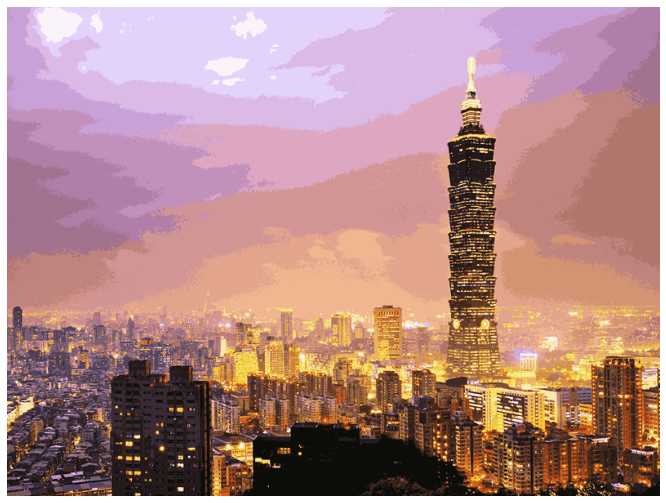

In [6]:
plt.figure(figsize=(12, 9))
plt.imshow(d); plt.axis('off')
plt.show()
for i in [2, 3, 5, 10, 30]:
    print('Number of clusters:', i)
    out = KMeansImage(d, i)
    centers, new_image = out['center_colors'], out['new_image']
    plt.figure(figsize=(12, 1))
    plt.imshow([centers]); plt.axis('off')
    plt.show()
    
    plt.figure(figsize=(12, 9))
    plt.imshow(new_image); plt.axis('off')
    plt.show()

In [7]:
def NMFImage(d, num_components):
    w, h, c = d.shape
    new_img = d.copy()
    for i in range(c):
        nmf = NMF(n_components=num_components)
        P = nmf.fit_transform(d[:, :, i])
        Q = nmf.components_
        new_img[:, : ,i] = np.clip(P @ Q, 0, 1)
    return {'new_image': new_img}

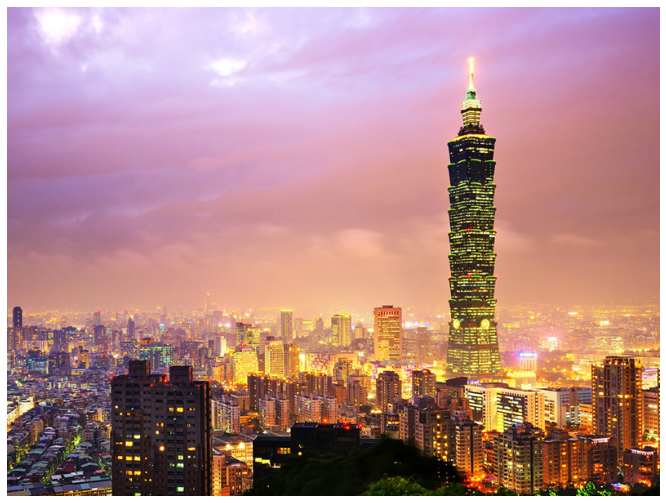

Number of components: 1


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\JupyterLab\resources\jl

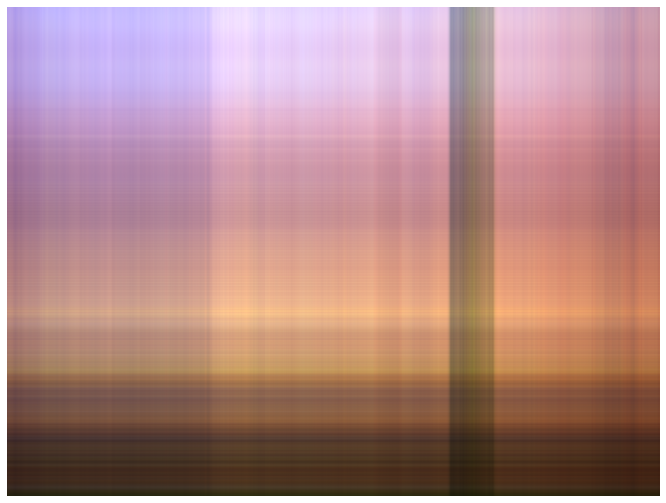

Number of components: 2


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\JupyterLab\resources\jl

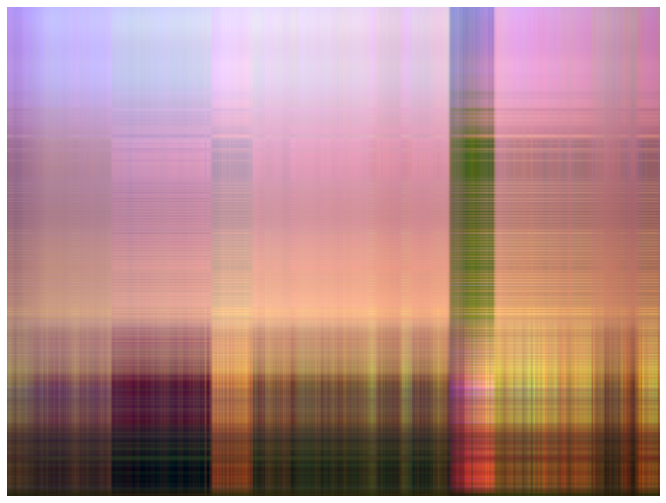

Number of components: 3


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\JupyterLab\resources\jl

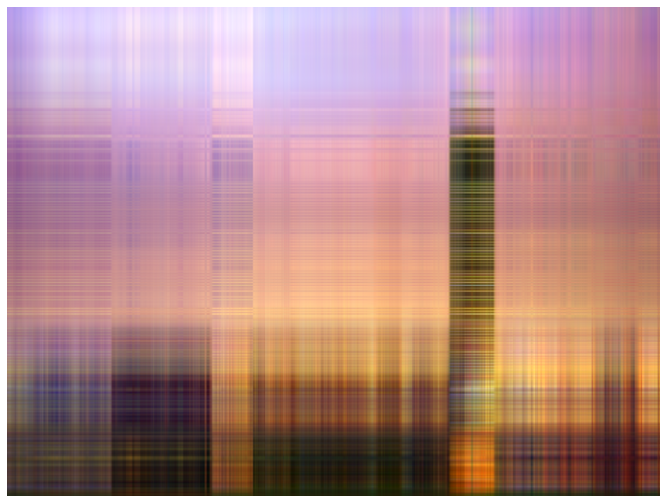

In [8]:
plt.figure(figsize=(12, 9))
plt.imshow(d); plt.axis('off')
plt.show()
for i in [1, 2, 3]:
    print('Number of components:', i)
    out = NMFImage(d, i)
    new_image = out['new_image']
    plt.figure(figsize=(12, 9))
    plt.imshow(new_image); plt.axis('off')
    plt.show()

In [83]:
data = [[[0,0,0,0,0,0], [4,5,2,7,87,7], [4,0,6,7,4,2], [3,5,0,5,0,4], [34,54,4,23,12,3], [45,3,43,5,6,3], [4,54,3,4,2,23], [54,0,0,23,4,5], [54,65,34,0,0,5], [54,0,0,7,0,5]],
[[3,5,7,9,1,2], [0,0,0,0,0,0],  [4,4,5,0,7,6], [4,6,43,3,5,6], [3,4,6,7,6,8], [34,5,3,2,45,3], [43,32,5,34,34,23], [54,34,54,6,3,43], [54,65,0,5,0,0], [56,0,7,0,54,43]],
[[3,4,6,1,2,4], [6,5,23,5,6,8], [0,0,0,0,0,0], [34,6,45,76,45,5], [3,5,0,67,5,3], [4,6,7,2,34,3], [32,52,68,3,4,5], [43,6,3,0,0,0], [54,6,34,0,75,43], [54,0,0,0,3,43]],
[[3,4,23,6,8,9], [1,4,56,0,8,4], [5,4,6,5,3,2], [0,0,0,0,0,0], [2,4,5,0,44,5], [32,4,0,2,0,3], [54,23,54,4,43,4], [5,23,7,45,34,75], [65,0,64,43,43,24], [43,0,23,6,4,43]],
[[2,4,57,8,1,2], [2,4,0,8,0,2], [2,4,5,65,0,4], [45,3,0,6,0,7], [0,0,0,0,0,0], [32,4,5,6,7,4], [43,64,0,0,0,43], [5,3,75,34,45,43], [64,42,64,45,34,46], [43,0,0,0,0,34]],
[[5,6,12,6,8,67], [3,4,5,7,2,9],  [4,2,6,5,8,5],  [34,5,6,4,7,4], [34,64,7,65,23,45], [0,0,0,0,0,0], [43,5,0,3,34,4], [43,64,76,45,76,9], [43,6,34,6,0,64], [43,0,0,0,76,45]],
[[3,4,5,7,1,9], [11,4,5,4,5,67], [4,3,6,5,0,0], [54,2,4,6,7,4], [56,34,2,4,6,7], [43,12,45,6,3,2], [0,0,0,0,0,0], [87,5,54,0,46,64], [64,0,0,43,64,34], [0,0,0,0,54,76]],
[[3,5,7,9,2,3], [4,2,6,68,0,5], [4,3,46,0,0,5], [0,23,0,7,34,3], [56,34,23,65,32,5], [4,5,6,2,6,2], [3,4,6,3,6,2], [0,0,0,0,0,0], [64,34,0,0,64,34], [75,54,0,0,0,0]],
[[2,4,5,7,8,9], [2,4,5,67,8,9], [6,4,3,54,7,78], [0,23,0,6,0,4], [45,23,5,4,56,56], [34,13,0,3,5,64], [6,3,32,5,2,0], [75,86,0,76,65,76], [0,0,0,0,0,0], [65,34,65,0,0,0]],
[[2,6,9,2,4,0], [2,4,5,6,7,8], [0,7,4,0,0,7], [1,4,0,0,6,0], [34,6,5,4,7,0], [3,5,0,2,6,3], [43,2,0,43,2,4], [65,34,65,0,75,43], [65,34,0,45,65,34], [0,0,0,0,0,0]]]


In [80]:
data_z = np.array(data)

In [81]:
data_z.shape

(10, 10, 6)

In [ ]:
def NMFget(d, num_components):
    w, h, c = d.shape
    new_img = d.copy()
    for i in range(c):
        nmf = NMF(n_components=num_components)
        P = nmf.fit_transform(d[:, :, i])
        Q = nmf.components_
        new_img[:, : ,i] = np.clip(P @ Q, 0, 1)
    return {'new_image': new_img}

In [59]:
def KMeansget(d, n_colors):
    w, h, c = d.shape
    new_img = d.copy()

    dd = np.reshape(d, (w * h, c))
    km = KMeans(n_clusters=n_colors)
    km.fit(dd)
    labels = km.predict(dd)
    centers = km.cluster_centers_

    for i in range(w):
        for j in range(h):
            ij = i * h + j
            new_img[i][j] = centers[labels[ij]]
    print(new_img)
    return new_img

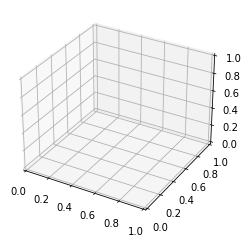

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

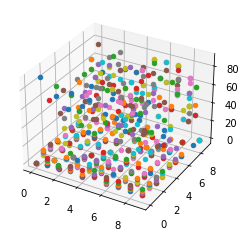

In [84]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, c = data_z.shape

for i in range(x):
    for j in range(y):
        for m in range(c):
            z = data_z[i][j][m]
            ax.scatter(i, j, z)



# ax.plot(x, y, z, label='parametric curve')
# ax.legend()

plt.show()

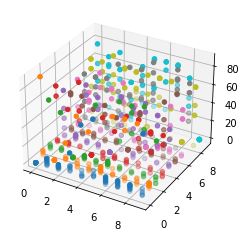

In [85]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, c = data_z.shape

for i in range(x):
    for j in range(y):
        ax.scatter(i, j, data_z[i][j])



# ax.plot(x, y, z, label='parametric curve')
# ax.legend()

plt.show()

In [86]:
new_data_z = KMeansget(data_z, 3)

[[[12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [54 42 36 44 49 32]
  [54 42 36 44 49 32]]

 [[12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [54 42 36 44 49 32]
  [21  9 22 11 16 55]
  [54 42 36 44 49 32]
  [54 42 36 44 49 32]]

 [[12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [54 42 36 44 49 32]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [21  9 22 11 16 55]
  [54 42 36 44 49 32]
  [54 42 36 44 49 32]]

 [[12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [54 42 36 44 49 32]
  [21  9 22 11 16 55]
  [54 42 36 44 49 32]
  [21  9 22 11 16 55]]

 [[12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  [12  8 14 11 12  4]
  

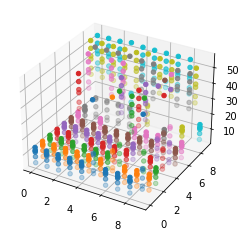

In [87]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, c = new_data_z.shape

for i in range(x):
    for j in range(y):
        ax.scatter(i, j, new_data_z[i][j])



# ax.plot(x, y, z, label='parametric curve')
# ax.legend()

plt.show()

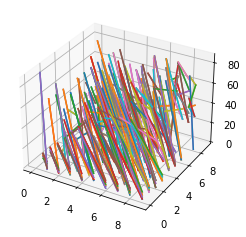

In [88]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, c = data_z.shape

for i in range(x):
    for j in range(y):
        for m in range(c):
            z1 = data_z[i][j][m]
            z2 = data_z[j][i][m]
            ax.plot3D([i, j], [j, i], [z1, z2])

plt.show()

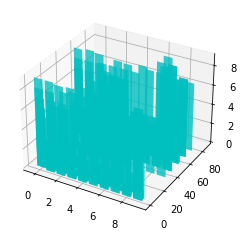

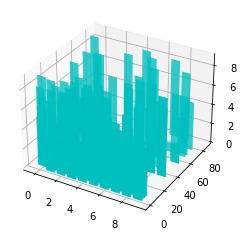

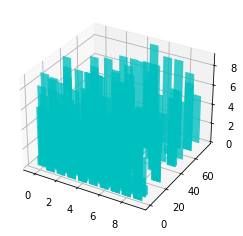

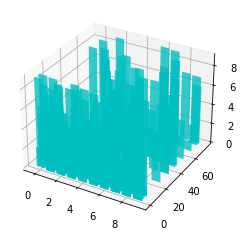

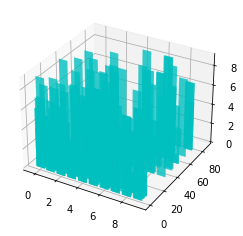

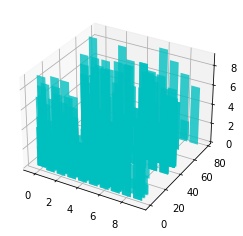

In [121]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10

x, y, c = data_z.shape

for m in range(c):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(x):
        for j in range(y):
            z1 = data_z[i][j][m]
            z2 = data_z[j][i][m]
            ax.bar([i, j], [j, i], zs=z1, zdir='y', color="c", alpha=0.8)

    plt.show()

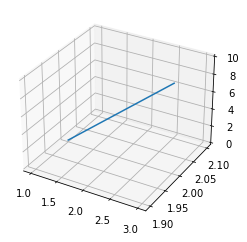

In [109]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot3D([1, 3], [2, 2], [0, 10])

plt.show()

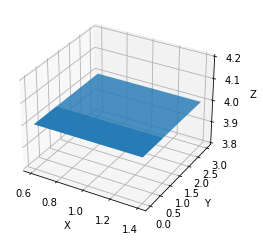

In [126]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar([1,1], [3,1], 4, alpha=0.8)
 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
 
plt.show()

In [116]:
xs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [117]:
ys

array([0.54461166, 0.69426335, 0.81323034, 0.32448478, 0.90444044,
       0.18396233, 0.41026952, 0.79528291, 0.55679491, 0.50608482,
       0.2313235 , 0.83125069, 0.19875706, 0.31389126, 0.79866282,
       0.58598655, 0.5210882 , 0.46362041, 0.25381692, 0.38135883])

In [118]:
z

0